In [1]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2024-04-01 20:29:54.272636: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-01 20:29:54.307041: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-01 20:29:54.816244: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
model = keras.applications.MobileNetV2(weights='imagenet', include_top=True)

2024-04-01 20:29:55.340754: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-01 20:29:55.340981: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [3]:
def preprocess_image(image_path):
    img = keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = keras.applications.mobilenet_v2.preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [4]:
def classify_image(image_path):
    preprocessed_image = preprocess_image(image_path)
    predictions = model.predict(preprocessed_image)
    decoded_predictions = keras.applications.mobilenet_v2.decode_predictions(predictions, top=3)[0]
    return decoded_predictions

In [9]:
image_path = '/mnt/c/Users/adria/Downloads/vida-de-gato.jpg'

In [10]:
predictions = classify_image(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [11]:
for i, (imagenet_id, label, score) in enumerate(predictions):
    print(f"{i + 1}: {label} ({score:.2f})")


1: tabby (0.45)
2: tiger_cat (0.44)
3: Egyptian_cat (0.02)


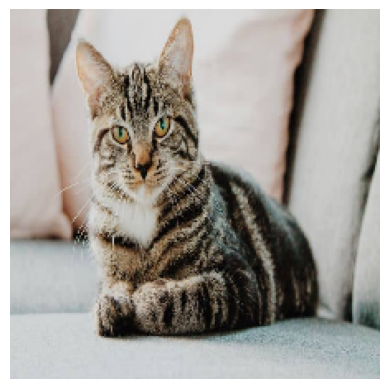

In [12]:
img = keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.show()
